In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import RegexpTokenizer
from pattern.text.en import singularize
from collections import Counter

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

# The data

In [2]:
path = os.getcwd().replace("\\", "/") + "/"
df = pd.read_excel(path + "springer_link_data_with_discipline.xlsx", index_col = 0)

In [3]:
print(f"{df.shape} Papers")

(787, 9) Papers


In [4]:
df.drop(columns="article_type", inplace = True)
df

,title,link,abstract,author,date,year,n_citations,discipline
0,Effects of Sports Betting Motivations on Sport...,https://link.springer.com/article/10.1007/s114...,Many earlier studies conducted on sports betti...,"Sevda Gökce Yüce,Arif Yüce,Hakan Katırcı,[…],A...",2021-06-07,2021,2.0,Medicine & Public Health
1,Transformation of Sports Betting into a Rapid ...,https://link.springer.com/article/10.1007/s114...,There is an increasing trend for online sports...,"Adrian Parke,Jonathan Parke",2019-01-04,2019,13.0,Medicine & Public Health
2,Sports-Embedded Gambling Promotions: A Study o...,https://link.springer.com/article/10.1007/s114...,"Community, media and government concerns have ...","Nerilee Hing,Matthew Lamont,[…],Peter Vitartas...",2014-11-25,2014,41.0,Medicine & Public Health
3,A comparative content analysis of media report...,https://link.springer.com/article/10.1186/s128...,BackgroundHarmful gambling is a significant pu...,"Jennifer L. David,Samantha L. Thomas,Melanie R...",2017-11-14,2017,3.0,Medicine & Public Health
4,Alcohol consumption and sports-betting among y...,https://link.springer.com/article/10.1186/s128...,BackgroundThe popularity of sports-betting is ...,"Stella Cheryl Nabifo,Jonathan Izudi,Francis Ba...",2021-02-16,2021,NaN,Medicine & Public Health
...,...,...,...,...,...,...,...,...
782,Die Notwendigkeit einer Pflege naturwissenscha...,https://link.springer.com/article/10.1007/BF00...,NaN,Werner Kroebel,1963-01,1963,NaN,Life Sciences
783,The asteroid and comet impact hazard: risk ass...,https://link.springer.com/article/10.1007/s001...,The impact of extraterrestrial matter onto Ear...,"Christian Gritzner,Kai Dürfeld,[…],Jan Kasper,...",2006-05-03,2006,11.0,Life Sciences
784,A rational asymmetric reaction to news: eviden...,https://link.springer.com/article/10.1007/s111...,Using a large dataset of matches played betwee...,"Jason P. Berkowitz,Craig A. Depken II",2017-09-30,2017,2.0,Finance
785,"Foresight 2.0 - Definition, overview & evaluation",https://link.springer.com/article/10.1007/s403...,This paper contains a definition of Foresight ...,"Jörg Schatzmann,René Schäfer,Frederik Eichelbaum",2013-08-09,2013,30.0,History


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787 entries, 0 to 786
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        787 non-null    object 
 1   link         787 non-null    object 
 2   abstract     766 non-null    object 
 3   author       776 non-null    object 
 4   date         787 non-null    object 
 5   year         787 non-null    int64  
 6   n_citations  720 non-null    float64
 7   discipline   787 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 55.3+ KB


## Select the papers that have abstract (abstract is not null)

In [6]:
data = df[df['abstract'].notna()]
data.reset_index(drop = True, inplace = True)
data

,title,link,abstract,author,date,year,n_citations,discipline
0,Effects of Sports Betting Motivations on Sport...,https://link.springer.com/article/10.1007/s114...,Many earlier studies conducted on sports betti...,"Sevda Gökce Yüce,Arif Yüce,Hakan Katırcı,[…],A...",2021-06-07,2021,2.0,Medicine & Public Health
1,Transformation of Sports Betting into a Rapid ...,https://link.springer.com/article/10.1007/s114...,There is an increasing trend for online sports...,"Adrian Parke,Jonathan Parke",2019-01-04,2019,13.0,Medicine & Public Health
2,Sports-Embedded Gambling Promotions: A Study o...,https://link.springer.com/article/10.1007/s114...,"Community, media and government concerns have ...","Nerilee Hing,Matthew Lamont,[…],Peter Vitartas...",2014-11-25,2014,41.0,Medicine & Public Health
3,A comparative content analysis of media report...,https://link.springer.com/article/10.1186/s128...,BackgroundHarmful gambling is a significant pu...,"Jennifer L. David,Samantha L. Thomas,Melanie R...",2017-11-14,2017,3.0,Medicine & Public Health
4,Alcohol consumption and sports-betting among y...,https://link.springer.com/article/10.1186/s128...,BackgroundThe popularity of sports-betting is ...,"Stella Cheryl Nabifo,Jonathan Izudi,Francis Ba...",2021-02-16,2021,NaN,Medicine & Public Health
...,...,...,...,...,...,...,...,...
761,Die Beziehung zwischen Nahrungsaufwand und kör...,https://link.springer.com/article/10.1007/BF01...,"1)Sitzungsber. d. Bayer. Akad. d. Wiss. 1885, ...",Max Rubner,1927-03,1927,2.0,Life Sciences
762,The asteroid and comet impact hazard: risk ass...,https://link.springer.com/article/10.1007/s001...,The impact of extraterrestrial matter onto Ear...,"Christian Gritzner,Kai Dürfeld,[…],Jan Kasper,...",2006-05-03,2006,11.0,Life Sciences
763,A rational asymmetric reaction to news: eviden...,https://link.springer.com/article/10.1007/s111...,Using a large dataset of matches played betwee...,"Jason P. Berkowitz,Craig A. Depken II",2017-09-30,2017,2.0,Finance
764,"Foresight 2.0 - Definition, overview & evaluation",https://link.springer.com/article/10.1007/s403...,This paper contains a definition of Foresight ...,"Jörg Schatzmann,René Schäfer,Frederik Eichelbaum",2013-08-09,2013,30.0,History


## Abstracts and titles that contain the words sports or bettting or their synonyms or their lemmas

In [7]:
list_of_words = ["sports", "betting"]
synonyms = []

for word in list_of_words:
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
synonyms = list(set(synonyms))

In [8]:
l_ok = []
for i, val in enumerate(data[["title","abstract"]].values):
    for word in synonyms:
        if word in val[1].lower() or word in val[0].lower():
            l_ok.append(data.iloc[i].values)
            break
cleaned_data = pd.DataFrame(l_ok, columns=data.columns)
cleaned_data

,title,link,abstract,author,date,year,n_citations,discipline
0,Effects of Sports Betting Motivations on Sport...,https://link.springer.com/article/10.1007/s114...,Many earlier studies conducted on sports betti...,"Sevda Gökce Yüce,Arif Yüce,Hakan Katırcı,[…],A...",2021-06-07,2021,2.0,Medicine & Public Health
1,Transformation of Sports Betting into a Rapid ...,https://link.springer.com/article/10.1007/s114...,There is an increasing trend for online sports...,"Adrian Parke,Jonathan Parke",2019-01-04,2019,13.0,Medicine & Public Health
2,Sports-Embedded Gambling Promotions: A Study o...,https://link.springer.com/article/10.1007/s114...,"Community, media and government concerns have ...","Nerilee Hing,Matthew Lamont,[…],Peter Vitartas...",2014-11-25,2014,41.0,Medicine & Public Health
3,A comparative content analysis of media report...,https://link.springer.com/article/10.1186/s128...,BackgroundHarmful gambling is a significant pu...,"Jennifer L. David,Samantha L. Thomas,Melanie R...",2017-11-14,2017,3.0,Medicine & Public Health
4,Alcohol consumption and sports-betting among y...,https://link.springer.com/article/10.1186/s128...,BackgroundThe popularity of sports-betting is ...,"Stella Cheryl Nabifo,Jonathan Izudi,Francis Ba...",2021-02-16,2021,NaN,Medicine & Public Health
...,...,...,...,...,...,...,...,...
623,A comparative study of different acceleration ...,https://link.springer.com/article/10.1186/s136...,"At present, there are many acceleration sensor...","Qixia Jia,Zengyin Yan,Yongyong Wang",2021-11-09,2021,NaN,Engineering
624,The asteroid and comet impact hazard: risk ass...,https://link.springer.com/article/10.1007/s001...,The impact of extraterrestrial matter onto Ear...,"Christian Gritzner,Kai Dürfeld,[…],Jan Kasper,...",2006-05-03,2006,11.0,Life Sciences
625,A rational asymmetric reaction to news: eviden...,https://link.springer.com/article/10.1007/s111...,Using a large dataset of matches played betwee...,"Jason P. Berkowitz,Craig A. Depken II",2017-09-30,2017,2.0,Finance
626,"Foresight 2.0 - Definition, overview & evaluation",https://link.springer.com/article/10.1007/s403...,This paper contains a definition of Foresight ...,"Jörg Schatzmann,René Schäfer,Frederik Eichelbaum",2013-08-09,2013,30.0,History


## Checking what was droped

In [9]:
bad_data = data.merge(cleaned_data.drop_duplicates(), on = data.columns.to_list(), how = "left", indicator = True)
bad_data[bad_data["_merge"] == "left_only"]

,title,link,abstract,author,date,year,n_citations,discipline,_merge
51,From Adolescent to Adult Gambling: An Analysis...,https://link.springer.com/article/10.1007/s108...,Although there are many cross-sectional studie...,"Paul Delfabbro,Daniel King,Mark D. Griffiths",2013-04-18,2013,58.0,Medicine & Public Health,left_only
72,Are Psychology University Student Gamblers Rep...,https://link.springer.com/article/10.1007/s108...,Students recruited from psychology undergradua...,"Sally M. Gainsbury,Alex Russell,Alex Blaszczynski",2012-10-11,2012,134.0,Medicine & Public Health,left_only
92,Behaviour Change Strategies Endorsed by Gamble...,https://link.springer.com/article/10.1007/s108...,Problem gambling is often accompanied by co-mo...,"Brenna Knaebe,Simone N. Rodda,[…],David C. Hod...",2018-10-10,2018,3.0,Medicine & Public Health,left_only
101,Exploring the Impact of Gambling Advertising: ...,https://link.springer.com/article/10.1007/s114...,This study qualitatively explored the impact o...,Per Binde,2008-12-20,2008,58.0,Medicine & Public Health,left_only
105,High Stakes: Children’s Exposure to Gambling a...,https://link.springer.com/article/10.1007/s114...,Concerns continue to be raised about the ‘norm...,"Moira Smith,Tim Chambers,[…],Max Abbott,Louise...",2019-05-31,2019,6.0,Medicine & Public Health,left_only
...,...,...,...,...,...,...,...,...,...
753,Attraction or Distraction? Corporate Social Re...,https://link.springer.com/article/10.1007/s105...,\nThis paper attempts to investigate how and w...,"Tiffany Cheng Han Leung,Robin Stanley Snell",2015-10-12,2015,29.0,Philosophy,left_only
755,Can an Industry Be Socially Responsible If Its...,https://link.springer.com/article/10.1007/s105...,Online gambling companies claim that they are ...,"Mirella Yani-de-Soriano,Uzma Javed,Shumaila Yo...",2012-10-04,2012,51.0,Philosophy,left_only
756,The ethics of tolerance and the evolution of s...,https://link.springer.com/article/10.1007/BF00...,"Since 1964, there has been an expansion in the...","Richard Mcgowan,Timothy Brown",1994-10,1994,4.0,Philosophy,left_only
760,"Cigarette characteristics, smoker characterist...",https://link.springer.com/article/10.1007/BF01...,Data were collected from eight cities on a wid...,"Michael J. Karter Jr.,Terry L. Kissinger,Aliso...",1994-11,1994,10.0,Engineering,left_only


In [10]:
for title in bad_data[bad_data["_merge"] == "left_only"].title.values:
    print(title)
    print()

From Adolescent to Adult Gambling: An Analysis of Longitudinal Gambling Patterns in South Australia

Are Psychology University Student Gamblers Representative of Non-university Students and General Gamblers? A Comparative Analysis

Behaviour Change Strategies Endorsed by Gamblers Subtyped by Psychological Distress, Risky Alcohol Use, and Impulsivity

Exploring the Impact of Gambling Advertising: An Interview Study of Problem Gamblers

High Stakes: Children’s Exposure to Gambling and Gambling Marketing Using Wearable Cameras

A Gamblers Clustering Based on Their Favorite Gambling Activity

Internet Gambling and Problem Gambling Among 13 to 18 Year Old Adolescents in Iceland

Where Lies the Harm in Lottery Gambling? A Portrait of Gambling Practices and Associated Problems

Cognitive Characteristics of Strategic and Non-strategic Gamblers

Assessment and Treatment of Gambling Behavior

Book reviews

Gambling Among Indigenous Men and Problem Gambling Risk Factors: An Australian Study

Gamb

# Data analysis

## Papers by year

In [11]:
cleaned_data.groupby("year").year.count()

year
1938     1
1987     1
1988     4
1989     1
1990     3
1991     1
1992     5
1993     3
1995     3
1996     4
1997     4
1998     4
2000     5
2001     3
2002     3
2003     3
2004     9
2005     9
2006    12
2007    17
2008    14
2009    20
2010    20
2011    20
2012    26
2013    38
2014    42
2015    38
2016    35
2017    49
2018    47
2019    65
2020    55
2021    64
Name: year, dtype: int64

In [12]:
cleaned_data["year"].unique()

array([2021, 2019, 2014, 2017, 2018, 2020, 2013, 2015, 2016, 1992, 2004,
       2012, 2002, 2011, 2001, 2008, 2007, 2000, 2009, 2010, 2006, 1997,
       1996, 1990, 1995, 1988, 2005, 1993, 1987, 1998, 1991, 1989, 2003,
       1938], dtype=int64)

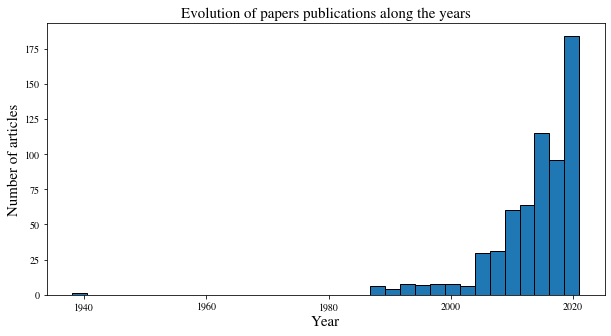

In [13]:
n_bins = len(cleaned_data["year"].unique())
plt.figure(figsize=(10, 5))
plt.hist(cleaned_data["year"], bins = n_bins, ec = "black")
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Number of articles", fontsize = 15)
plt.title("Evolution of papers publications along the years", fontsize = 15)
plt.show()

### Checking the paper from 1940

In [14]:
cleaned_data[cleaned_data["year"] == cleaned_data["year"].min()].abstract.values[0]

'\n\n\n1.\nMittels physikalischer Methoden werden bei Gesunden und Kranken in indifferenten, kühlen und heißen Süßwasser- und CO2-Sprudelbädern Minutenvolumen, peripherer Widerstand und Elastizitätsverhältnisse der großen Arterien fortlaufend bestimmt.\n\n\n2.\nSchlag- und Minutennvolumen steigen vor allem zu Beginn des Bades an. Dabei sinkt der Blutdruck ab, oder bleibt unverändert.\n\n\n3.\nDieses Verhalten des Blutdruckes ist bedingt einmal durch eine Herabsetzung des peripheren Widerstandes, dann durch eine Herabsetzung des Elastizitätskoeffizienten des Windkessels und der großen Arterien, d. h. der Windkessel wird im Bade dehnbarer. Dabei handelt es sich wahrscheinlich um reflektorisch ausgelöste Änderungen im Kontraktionszustand der Gefäßwandmuskulatur.\n\n\n4.\nDie Befunde ermöglichen eine Erklärung für die praktischen Erfolge der Badebehandlung der Hypertonie, worauf kurz eingegangen wird.\n\n\n'

In [15]:
cleaned_data[cleaned_data["year"] == cleaned_data["year"].min()].link.values[0]

'https://link.springer.com/article/10.1007/BF01772836'

No paper was published between 1940 annd 1980

In [16]:
cleaned_data[(cleaned_data["year"] >= cleaned_data["year"].min()) & (cleaned_data["year"] <= 1980)]

,title,link,abstract,author,date,year,n_citations,discipline
612,Zum Verhalten des Windkessels und des Peripher...,https://link.springer.com/article/10.1007/BF01...,\n\n\n1.\nMittels physikalischer Methoden werd...,"W. Herkel,P. D. Papageorgiou",1938-07,1938,1.0,Biomedicine


In [17]:
cleaned_data.drop(cleaned_data[cleaned_data["year"] == cleaned_data["year"].min()].index, inplace= True)
cleaned_data.reset_index(drop=True)

,title,link,abstract,author,date,year,n_citations,discipline
0,Effects of Sports Betting Motivations on Sport...,https://link.springer.com/article/10.1007/s114...,Many earlier studies conducted on sports betti...,"Sevda Gökce Yüce,Arif Yüce,Hakan Katırcı,[…],A...",2021-06-07,2021,2.0,Medicine & Public Health
1,Transformation of Sports Betting into a Rapid ...,https://link.springer.com/article/10.1007/s114...,There is an increasing trend for online sports...,"Adrian Parke,Jonathan Parke",2019-01-04,2019,13.0,Medicine & Public Health
2,Sports-Embedded Gambling Promotions: A Study o...,https://link.springer.com/article/10.1007/s114...,"Community, media and government concerns have ...","Nerilee Hing,Matthew Lamont,[…],Peter Vitartas...",2014-11-25,2014,41.0,Medicine & Public Health
3,A comparative content analysis of media report...,https://link.springer.com/article/10.1186/s128...,BackgroundHarmful gambling is a significant pu...,"Jennifer L. David,Samantha L. Thomas,Melanie R...",2017-11-14,2017,3.0,Medicine & Public Health
4,Alcohol consumption and sports-betting among y...,https://link.springer.com/article/10.1186/s128...,BackgroundThe popularity of sports-betting is ...,"Stella Cheryl Nabifo,Jonathan Izudi,Francis Ba...",2021-02-16,2021,NaN,Medicine & Public Health
...,...,...,...,...,...,...,...,...
622,A comparative study of different acceleration ...,https://link.springer.com/article/10.1186/s136...,"At present, there are many acceleration sensor...","Qixia Jia,Zengyin Yan,Yongyong Wang",2021-11-09,2021,NaN,Engineering
623,The asteroid and comet impact hazard: risk ass...,https://link.springer.com/article/10.1007/s001...,The impact of extraterrestrial matter onto Ear...,"Christian Gritzner,Kai Dürfeld,[…],Jan Kasper,...",2006-05-03,2006,11.0,Life Sciences
624,A rational asymmetric reaction to news: eviden...,https://link.springer.com/article/10.1007/s111...,Using a large dataset of matches played betwee...,"Jason P. Berkowitz,Craig A. Depken II",2017-09-30,2017,2.0,Finance
625,"Foresight 2.0 - Definition, overview & evaluation",https://link.springer.com/article/10.1007/s403...,This paper contains a definition of Foresight ...,"Jörg Schatzmann,René Schäfer,Frederik Eichelbaum",2013-08-09,2013,30.0,History


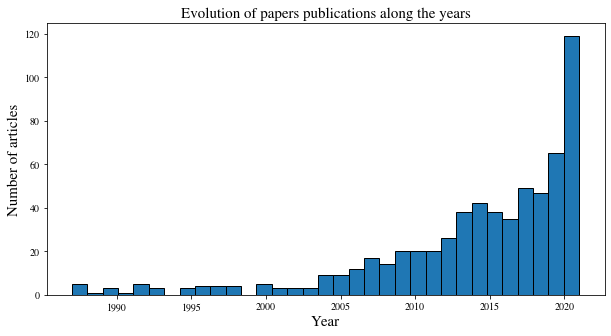

In [18]:
n_bins = len(cleaned_data["year"].unique())
plt.figure(figsize=(10, 5))
plt.hist(cleaned_data["year"], bins = n_bins, ec = "black")
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Number of articles", fontsize = 15)
plt.title("Evolution of papers publications along the years", fontsize = 15)
plt.show()

## Papers by discipline

In [19]:
papers_discipline = cleaned_data.groupby("discipline").discipline.count().sort_values(ascending = False)
papers_discipline

discipline
Medicine & Public Health            469
Economics                            39
Business and Management              27
Law                                  23
Social Sciences                      17
Criminology and Criminal Justice     13
Psychology                           11
Computer Science                     10
Mathematics                           7
Engineering                           3
Biomedicine                           3
Physics                               1
Philosophy                            1
Life Sciences                         1
History                               1
Finance                               1
Name: discipline, dtype: int64

In [20]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct

[]

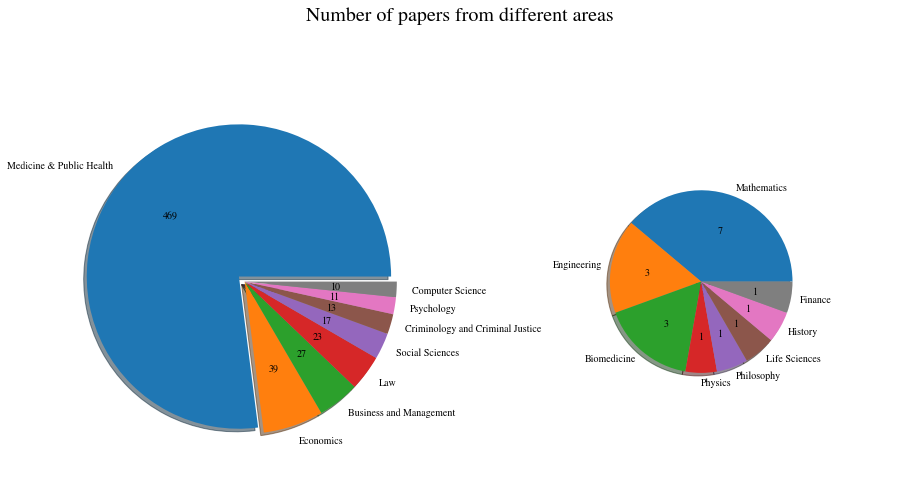

In [21]:
principal_pie = papers_discipline[ papers_discipline >= 10]
secondary_pie = papers_discipline[ papers_discipline < 10]
explode = [0 for i in range(len(principal_pie))]
explode[0] = 0.05
plt.figure(figsize=(15, 8), facecolor="1")
plt.suptitle("Number of papers from different areas", fontsize = 20)
plt.subplot(1, 2, 1)
plt.pie(principal_pie.values, labels = principal_pie.index.to_list(), autopct = make_autopct(principal_pie), shadow = True, explode = explode)
plt.subplot(1, 2, 2)
plt.pie(secondary_pie.values, labels = secondary_pie.index.to_list(), autopct = make_autopct(secondary_pie), shadow = True, radius = 0.6)
plt.plot()

## Counting the nouns frequency in the abstracts

In [22]:
def CleanedAbstractColumn(df):
    cleaned_abstracts_str = []
    tokenizer = RegexpTokenizer(r'\w+')
    for abstract in df["abstract"]:
        s = ""
        for word in tokenizer.tokenize(abstract):
            s += word.lower() + " "
        cleaned_abstracts_str.append(s[:-1])
    df["cleaned_abstracts_str"] = cleaned_abstracts_str
    return df

In [23]:
def GetAllNouns(t):
    if isinstance(t, str):
        tokens = nltk.word_tokenize(t)
    else:
        tokens = t
    tagged = nltk.pos_tag(tokens)
    all_nouns_tuple = [nouns for nouns in tagged if "NN" in nouns[1]] 
    all_nouns = []
    for nouns in all_nouns_tuple:
        if len(nouns[0]) > 1:
            if nouns[1] == "NNS":
                all_nouns.append(singularize(nouns[0]))
            else:
                all_nouns.append(nouns[0])
    return all_nouns

In [24]:
cleaned_data = CleanedAbstractColumn(cleaned_data)
cleaned_data

,title,link,abstract,author,date,year,n_citations,discipline,cleaned_abstracts_str
0,Effects of Sports Betting Motivations on Sport...,https://link.springer.com/article/10.1007/s114...,Many earlier studies conducted on sports betti...,"Sevda Gökce Yüce,Arif Yüce,Hakan Katırcı,[…],A...",2021-06-07,2021,2.0,Medicine & Public Health,many earlier studies conducted on sports betti...
1,Transformation of Sports Betting into a Rapid ...,https://link.springer.com/article/10.1007/s114...,There is an increasing trend for online sports...,"Adrian Parke,Jonathan Parke",2019-01-04,2019,13.0,Medicine & Public Health,there is an increasing trend for online sports...
2,Sports-Embedded Gambling Promotions: A Study o...,https://link.springer.com/article/10.1007/s114...,"Community, media and government concerns have ...","Nerilee Hing,Matthew Lamont,[…],Peter Vitartas...",2014-11-25,2014,41.0,Medicine & Public Health,community media and government concerns have e...
3,A comparative content analysis of media report...,https://link.springer.com/article/10.1186/s128...,BackgroundHarmful gambling is a significant pu...,"Jennifer L. David,Samantha L. Thomas,Melanie R...",2017-11-14,2017,3.0,Medicine & Public Health,backgroundharmful gambling is a significant pu...
4,Alcohol consumption and sports-betting among y...,https://link.springer.com/article/10.1186/s128...,BackgroundThe popularity of sports-betting is ...,"Stella Cheryl Nabifo,Jonathan Izudi,Francis Ba...",2021-02-16,2021,NaN,Medicine & Public Health,backgroundthe popularity of sports betting is ...
...,...,...,...,...,...,...,...,...,...
623,A comparative study of different acceleration ...,https://link.springer.com/article/10.1186/s136...,"At present, there are many acceleration sensor...","Qixia Jia,Zengyin Yan,Yongyong Wang",2021-11-09,2021,NaN,Engineering,at present there are many acceleration sensors...
624,The asteroid and comet impact hazard: risk ass...,https://link.springer.com/article/10.1007/s001...,The impact of extraterrestrial matter onto Ear...,"Christian Gritzner,Kai Dürfeld,[…],Jan Kasper,...",2006-05-03,2006,11.0,Life Sciences,the impact of extraterrestrial matter onto ear...
625,A rational asymmetric reaction to news: eviden...,https://link.springer.com/article/10.1007/s111...,Using a large dataset of matches played betwee...,"Jason P. Berkowitz,Craig A. Depken II",2017-09-30,2017,2.0,Finance,using a large dataset of matches played betwee...
626,"Foresight 2.0 - Definition, overview & evaluation",https://link.springer.com/article/10.1007/s403...,This paper contains a definition of Foresight ...,"Jörg Schatzmann,René Schäfer,Frederik Eichelbaum",2013-08-09,2013,30.0,History,this paper contains a definition of foresight ...


In [25]:
all_abstracts_str = ""
for abstract in cleaned_data["cleaned_abstracts_str"]:
    all_abstracts_str += abstract + " "

In [26]:
all_nouns = GetAllNouns(all_abstracts_str)
frequency = nltk.FreqDist(all_nouns)

In [27]:
most_frequent_nouns = frequency.most_common(200)

In [28]:
most_frequent_n = 35
most_frequent = frequency.most_common(most_frequent_n)
#most_count

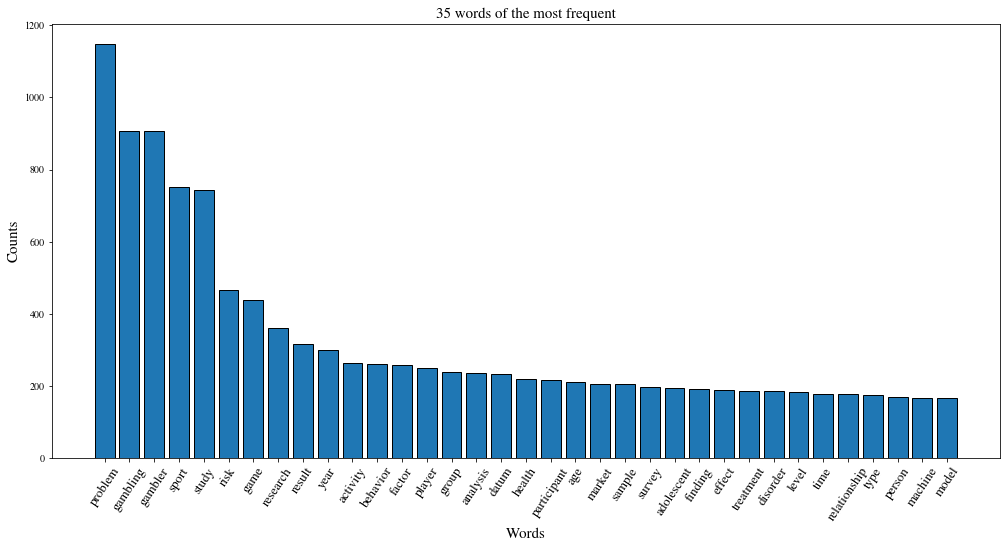

In [29]:
plt.figure(figsize=(17, 8))
plt.bar([word[0] for word in most_frequent], height = [word[1] for word in most_frequent], ec="black")
plt.xlabel("Words", fontsize = 15)
plt.xticks(rotation=56, fontsize = 13)
plt.ylabel("Counts", fontsize = 15)
plt.title(f"{most_frequent_n} words of the most frequent", fontsize = 15)
plt.show()

## Comparing most frequent words from the first search to a thermodynamics search

With this the words that are normally more frequent in general papers will be ignored in order to study the most frequent in the first search

In [30]:
thermodynamics_df = pd.read_excel(path + "thermodynamics_articles.xlsx", index_col = 0)
thermodynamics_df

,article_type,title,link,abstract,author,date,year,n_citations,discipline
0,Article,"ExHFT-5, 5th World Conference on Experimental ...",https://link.springer.com/article/10.1007/s003...,NaN,,2000-06,2000,8.0,Engineering
1,Article,Call for Nominations – The Nusselt–Reynolds Pr...,https://link.springer.com/article/10.1007/s003...,NaN,,2000-08,2000,NaN,Engineering
2,Article,Call for Nominations The Nusselt-Reynolds Priz...,https://link.springer.com/article/10.1007/s002...,NaN,,2000-03,2000,NaN,Engineering
3,Article,Flow geometry optimization of channels with ba...,https://link.springer.com/article/10.1007/s004...,NaN,"T. Ayhan,B. Karlik,A. Tandiroglu",2008-04-26,2008,1.0,Engineering
4,Article,The Mechanics and Thermodynamics of Continuous...,https://link.springer.com/article/10.1023/A%3A...,NaN,Paolo Maria Mariano,1999-12,1999,NaN,Engineering
...,...,...,...,...,...,...,...,...,...
634,Article,Principles of the dynamic mechanism of unforce...,https://link.springer.com/article/10.1007/BF02...,"\nIt is found that, according to basic princip...",V. D. Evdokimov,1997-05,1997,NaN,Engineering
635,Article,Plane waves in pyroelectrics with viscous effect,https://link.springer.com/article/10.1007/s007...,The present paper analyzes the propagation of ...,"Zhi-Dong Zhou,Feng-Peng Yang",2013-09-05,2013,4.0,Engineering
636,Article,A constitutive model for hysteresis: the conti...,https://link.springer.com/article/10.1007/s004...,"In this contribution, a constitutive model is ...","İsmail Doğan Külcü,Halil İbrahim Tanrıverdi",2020-03-31,2020,NaN,Engineering
637,Article,Effects of Temperature and Atmosphere on Sinte...,https://link.springer.com/article/10.1016/S100...,The relationship of time to minerals compositi...,"Jun Zhang,Xing-min Guo,Xue-jun Huang",2012-10-01,2012,9.0,Engineering


In [31]:
thermodynamics_df.drop(columns="article_type", inplace = True)

In [32]:
comparison_df = thermodynamics_df[thermodynamics_df['abstract'].notna()]
comparison_df.reset_index(drop = True, inplace = True)
comparison_df

,title,link,abstract,author,date,year,n_citations,discipline
0,"The foundations of thermodynamics, its basic p...",https://link.springer.com/article/10.1007/BF01...,This article reviews modern theories of irreve...,K. Hutter,1977-03,1977,101.0,Engineering
1,A formalism of nonlinear nonequilibrium thermo...,https://link.springer.com/article/10.1007/BF00...,The variational formalism is applied to the no...,I. F. Bakhareva,1973-05,1973,NaN,Engineering
2,Commentary: Recent Advances in Ab Initio Therm...,https://link.springer.com/article/10.1007/s118...,The Materials Genome Initiative (MGI)’s goals ...,Raymundo Arroyave,2013-10-01,2013,1.0,Engineering
3,The reciprocity principle in the thermodynamic...,https://link.springer.com/article/10.1007/BF00...,The phenomenological basis of the reciprocity ...,P. K. Konakov,1965-09,1965,NaN,Engineering
4,Chemical convective instability and quasi-equi...,https://link.springer.com/article/10.1007/BF01...,Si sviluppa un'analisi non lineare della stabi...,"Brian Straughan,Franco Bampi,Angelo Morro",1984-12,1984,NaN,Engineering
...,...,...,...,...,...,...,...,...
601,Principles of the dynamic mechanism of unforce...,https://link.springer.com/article/10.1007/BF02...,"\nIt is found that, according to basic princip...",V. D. Evdokimov,1997-05,1997,NaN,Engineering
602,Plane waves in pyroelectrics with viscous effect,https://link.springer.com/article/10.1007/s007...,The present paper analyzes the propagation of ...,"Zhi-Dong Zhou,Feng-Peng Yang",2013-09-05,2013,4.0,Engineering
603,A constitutive model for hysteresis: the conti...,https://link.springer.com/article/10.1007/s004...,"In this contribution, a constitutive model is ...","İsmail Doğan Külcü,Halil İbrahim Tanrıverdi",2020-03-31,2020,NaN,Engineering
604,Effects of Temperature and Atmosphere on Sinte...,https://link.springer.com/article/10.1016/S100...,The relationship of time to minerals compositi...,"Jun Zhang,Xing-min Guo,Xue-jun Huang",2012-10-01,2012,9.0,Engineering


In [33]:
comparison_df = CleanedAbstractColumn(comparison_df)
comparison_df

C:\Users\Legion\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,title,link,abstract,author,date,year,n_citations,discipline,cleaned_abstracts_str
0,"The foundations of thermodynamics, its basic p...",https://link.springer.com/article/10.1007/BF01...,This article reviews modern theories of irreve...,K. Hutter,1977-03,1977,101.0,Engineering,this article reviews modern theories of irreve...
1,A formalism of nonlinear nonequilibrium thermo...,https://link.springer.com/article/10.1007/BF00...,The variational formalism is applied to the no...,I. F. Bakhareva,1973-05,1973,NaN,Engineering,the variational formalism is applied to the no...
2,Commentary: Recent Advances in Ab Initio Therm...,https://link.springer.com/article/10.1007/s118...,The Materials Genome Initiative (MGI)’s goals ...,Raymundo Arroyave,2013-10-01,2013,1.0,Engineering,the materials genome initiative mgi s goals ar...
3,The reciprocity principle in the thermodynamic...,https://link.springer.com/article/10.1007/BF00...,The phenomenological basis of the reciprocity ...,P. K. Konakov,1965-09,1965,NaN,Engineering,the phenomenological basis of the reciprocity ...
4,Chemical convective instability and quasi-equi...,https://link.springer.com/article/10.1007/BF01...,Si sviluppa un'analisi non lineare della stabi...,"Brian Straughan,Franco Bampi,Angelo Morro",1984-12,1984,NaN,Engineering,si sviluppa un analisi non lineare della stabi...
...,...,...,...,...,...,...,...,...,...
601,Principles of the dynamic mechanism of unforce...,https://link.springer.com/article/10.1007/BF02...,"\nIt is found that, according to basic princip...",V. D. Evdokimov,1997-05,1997,NaN,Engineering,it is found that according to basic principles...
602,Plane waves in pyroelectrics with viscous effect,https://link.springer.com/article/10.1007/s007...,The present paper analyzes the propagation of ...,"Zhi-Dong Zhou,Feng-Peng Yang",2013-09-05,2013,4.0,Engineering,the present paper analyzes the propagation of ...
603,A constitutive model for hysteresis: the conti...,https://link.springer.com/article/10.1007/s004...,"In this contribution, a constitutive model is ...","İsmail Doğan Külcü,Halil İbrahim Tanrıverdi",2020-03-31,2020,NaN,Engineering,in this contribution a constitutive model is p...
604,Effects of Temperature and Atmosphere on Sinte...,https://link.springer.com/article/10.1016/S100...,The relationship of time to minerals compositi...,"Jun Zhang,Xing-min Guo,Xue-jun Huang",2012-10-01,2012,9.0,Engineering,the relationship of time to minerals compositi...


In [34]:
all_abstracts_comparison_str = ""
for abstract in comparison_df["cleaned_abstracts_str"]:
    all_abstracts_comparison_str += abstract + " "

In [35]:
all_nouns_comparison = GetAllNouns(all_abstracts_comparison_str)

In [36]:
frequency_comparison = nltk.FreqDist(all_nouns_comparison)

### Getting the 200 most common words for the comparison

In [37]:
most_frequent_nouns_comparison = frequency_comparison.most_common(200)
most_frequent_nouns_comparison

[('google', 936),
 ('scholar', 934),
 ('pp', 544),
 ('model', 525),
 ('thermodynamic', 463),
 ('equation', 416),
 ('system', 404),
 ('temperature', 398),
 ('energy', 391),
 ('theory', 385),
 ('heat', 366),
 ('process', 276),
 ('material', 254),
 ('result', 249),
 ('solution', 210),
 ('effect', 210),
 ('law', 205),
 ('rate', 205),
 ('entropy', 197),
 ('stress', 182),
 ('phase', 179),
 ('method', 176),
 ('paper', 171),
 ('gas', 170),
 ('condition', 169),
 ('metal', 163),
 ('function', 161),
 ('state', 158),
 ('tran', 157),
 ('time', 152),
 ('equilibrium', 150),
 ('extraction', 147),
 ('analysis', 146),
 ('study', 144),
 ('transfer', 143),
 ('parameter', 136),
 ('principle', 134),
 ('field', 134),
 ('order', 133),
 ('flow', 132),
 ('fluid', 125),
 ('surface', 123),
 ('reaction', 123),
 ('property', 123),
 ('kinetic', 118),
 ('relaxation', 118),
 ('approach', 117),
 ('relation', 115),
 ('case', 113),
 ('slag', 112),
 ('mass', 111),
 ('work', 110),
 ('adsorption', 108),
 ('copper', 107),
 (

### Frequent words in common

Checking if there are words present in the 200 most frequent words of the sports betting search that are also present in the 200 most frequent of the thermo search

In [38]:
nouns_in_common = []
for noun, count in most_frequent_nouns:
    for noun_comparison, count_comparison in most_frequent_nouns_comparison:
        if noun == noun_comparison:
            nouns_in_common.append((noun, count, count_comparison))
            break
nouns_in_common = sorted(nouns_in_common, key=lambda x: x[2], reverse=True)
print("Name, Frequency in the sports betting search, Frequency in the thermo search")
nouns_in_common

Name, Frequency in the sports betting search, Frequency in the thermo search


[('google', 88, 936),
 ('scholar', 103, 934),
 ('model', 167, 525),
 ('system', 55, 404),
 ('theory', 52, 385),
 ('process', 57, 276),
 ('result', 317, 249),
 ('effect', 190, 210),
 ('rate', 134, 205),
 ('law', 75, 205),
 ('method', 59, 176),
 ('paper', 139, 171),
 ('condition', 67, 169),
 ('state', 116, 158),
 ('time', 179, 152),
 ('analysis', 236, 146),
 ('study', 742, 144),
 ('order', 54, 133),
 ('approach', 86, 117),
 ('case', 65, 113),
 ('problem', 1147, 107),
 ('medium', 78, 100),
 ('variable', 106, 98),
 ('behavior', 261, 93),
 ('datum', 234, 93),
 ('term', 101, 88),
 ('form', 156, 87),
 ('performance', 80, 84),
 ('value', 50, 81),
 ('number', 155, 71),
 ('change', 99, 64),
 ('type', 175, 59),
 ('development', 79, 58),
 ('loss', 94, 50),
 ('article', 154, 46),
 ('use', 165, 44),
 ('difference', 150, 44),
 ('characteristic', 120, 43),
 ('response', 70, 42),
 ('way', 59, 40),
 ('range', 63, 39),
 ('point', 58, 38),
 ('influence', 51, 38),
 ('research', 360, 37),
 ('activity', 265,

### Selecting the words that are more frequent in the thermo search than in the sports betting search

In [39]:
more_frequent_in_thermo = [(noun, freq1, freq2) for noun, freq1, freq2 in nouns_in_common if freq1 < freq2]
print("Name, Frequency in the sports betting search, Frequency in the thermo search")
more_frequent_in_thermo

Name, Frequency in the sports betting search, Frequency in the thermo search


[('google', 88, 936),
 ('scholar', 103, 934),
 ('model', 167, 525),
 ('system', 55, 404),
 ('theory', 52, 385),
 ('process', 57, 276),
 ('effect', 190, 210),
 ('rate', 134, 205),
 ('law', 75, 205),
 ('method', 59, 176),
 ('paper', 139, 171),
 ('condition', 67, 169),
 ('state', 116, 158),
 ('order', 54, 133),
 ('approach', 86, 117),
 ('case', 65, 113),
 ('medium', 78, 100),
 ('performance', 80, 84),
 ('value', 50, 81)]

In [40]:
important_nouns = []
for noun, count in most_frequent_nouns:
    if noun not in [n[0] for n in more_frequent_in_thermo]:
        important_nouns.append((noun, count))
print(len(important_nouns))
print("Name, Frequency in the sports betting search")
important_nouns

181
Name, Frequency in the sports betting search


[('problem', 1147),
 ('gambling', 907),
 ('gambler', 907),
 ('sport', 752),
 ('study', 742),
 ('risk', 465),
 ('game', 439),
 ('research', 360),
 ('result', 317),
 ('year', 300),
 ('activity', 265),
 ('behavior', 261),
 ('factor', 260),
 ('player', 249),
 ('group', 238),
 ('analysis', 236),
 ('datum', 234),
 ('health', 220),
 ('participant', 216),
 ('age', 212),
 ('market', 207),
 ('sample', 205),
 ('survey', 198),
 ('adolescent', 195),
 ('finding', 193),
 ('treatment', 186),
 ('disorder', 186),
 ('level', 183),
 ('time', 179),
 ('relationship', 178),
 ('type', 175),
 ('person', 170),
 ('machine', 168),
 ('use', 165),
 ('adult', 164),
 ('bet', 163),
 ('student', 163),
 ('harm', 160),
 ('strategy', 157),
 ('form', 156),
 ('number', 155),
 ('article', 154),
 ('online', 154),
 ('casino', 152),
 ('male', 151),
 ('severity', 150),
 ('difference', 150),
 ('product', 146),
 ('impact', 145),
 ('participation', 141),
 ('population', 139),
 ('behaviour', 134),
 ('frequency', 132),
 ('match', 132